### Overview
This notebook gives an example of how to construct a simple daily gas curve model using the curves package. The function build_daily_gas_curve, defined below, takes a collection of traded forward prices, bootstraps out and overlapping prices, and then interpolates to a smooth daily curve. A constant weekend shaping factor is used to provide shaping of weekend versus weekday prices in the final curve.

In [7]:
from curves import contract_period as cp
from curves import bootstrap_contracts, max_smooth_interp, adjustments
from datetime import date

In [8]:
def build_daily_gas_curve(contracts, weekend_ratio, allow_redundancy=None, shaping_ratios=None, 
                                  shaping_spreads=None, front_1st_deriv=None, back_1st_deriv=None):
    
    piecewise_curve, bootstrapped_contracts = bootstrap_contracts(contracts, freq='D', allow_redundancy=allow_redundancy, 
                                        shaping_ratios=shaping_ratios, shaping_spreads=shaping_spreads)
    
    weekend_adjust = adjustments.dayofweek(default=1.0, saturday=weekend_ratio, sunday=weekend_ratio)
    
    smooth_curve = max_smooth_interp(bootstrapped_contracts, freq='D', mult_season_adjust=weekend_adjust, 
                                    front_1st_deriv=front_1st_deriv, back_1st_deriv=back_1st_deriv)
    
    return smooth_curve, piecewise_curve, bootstrapped_contracts

##### Inputs for the daily gas curve model

In [9]:
weekend_ratio = 0.9

contracts = [
                ((date(2019, 1, 1), date(2019, 1, 2)), 32.7), # manually specified contract period
                (date(2019, 1, 1), date(2019, 1, 7), 29.3), # manually specified contract period
                (cp.q_1(2019), 22.1), 
                (date(2019, 1, 1), date(2019, 1, 31), 25.5), # January 2019
                (cp.feb(2019), 23.3),
                (cp.q_2(2019), 18.3),
                (cp.q_3(2019), 17.1),
                (cp.q_4(2019), 20.1),
                (cp.winter(2019), 22.4),
                (cp.summer(2020), 19.9),
                (cp.winter(2020), 21.8),
                (cp.gas_year(2020), 20.01)
            ]

ratios = [
            (cp.q_1(2021), cp.q_4(2020), 1.09),
            (cp.q_3(2020), cp.q_2(2020), 1.005)
        ]

spreads = [
            (cp.jan(2020), cp.feb(2020), 0.5),
        ]

back_end_slope = 0.1

#### Run Curve Calculations

In [10]:
smooth_curve, piecewise_curve, bootstrapped_contracts = build_daily_gas_curve(contracts, weekend_ratio, shaping_ratios=ratios,
                                                      shaping_spreads=spreads, back_1st_deriv=back_end_slope)


#### Display Results

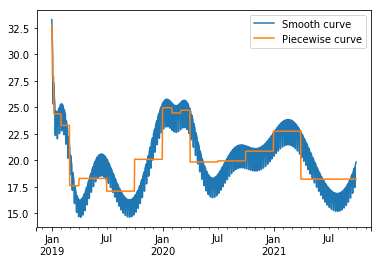

In [11]:
%matplotlib inline

smooth_curve.plot(legend=True)
ax = piecewise_curve.plot(legend=True)
ax.legend(['Smooth curve', 'Piecewise curve'])